A notebook focused just on defining the isolation criteria from the large WvW complexes

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('/Users/adams/python')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from astropy.io import ascii
from astropy import coordinates as coord
from astropy import units as u
import alfalfa
import uchvcs

In [8]:
#get candidates catalog
#note that spring candidate catalog is complete
#but for fall sky I will need to create the .csv file since I finished the grids last time I was at Cornell
name='/Users/adams/data/uchvcs/catalog/spring/spring_candidates.csv'
spring_cands=alfalfa.get_cat(name)

print 'done with cands'

check got hiname
check got ra,dec
check got l,b
check got vels
done with cands


In [5]:

#and code9s for comparison:
code9s = ascii.read('/Users/adams/data/uchvcs/catalog/code9s_cat.txt')
print 'done with code 9s'

done with code 9s


In [6]:
print code9s.colnames

['AGC', 'HIname', 'RA', 'Dec', 'l', 'b', 'cz', 'vlsr', 'vgsr', 'vlg', 'vdev', 'w50', 'hsize', 'flux', 'SN', 'code']


In [7]:
#also want to get just spring code9s for comparison purposes
#ind1 = np.where( code9s['RA']<270 )
#ind2=np.where(code9s['RA']> 60)
ind=np.where((code9s['RA']<270) & (code9s['RA']> 60) )
spring_code9s = code9s[ind]

In [10]:
#also want WvW catalog
wvw=alfalfa.get_cat('/Users/adams/data/uchvcs/catalog/spring/wvw_hvc_cat_edited.txt')
#and all LG gals
#print wvw
#plus LG gals in ALFALFA footprint
lg=alfalfa.get_cat('/Users/adams/data/uchvcs/catalog/local_gals_positions_nov12.txt')
print lg

#get spring only local also:
lg_spring=alfalfa.get_cat('/Users/adams/data/uchvcs/catalog/local_gals_spring_positions_nov12.txt')


check got hiname
check got ra,dec
check got l,b
check got vels
check got hiname
check got ra,dec
check got l,b
check got vels
       AGC               HIname       ...         SN                 code       
------------------ ------------------ ... ------------------ -------------------
1.49166814624e-154 1.49166814624e-154 ... 1.49166814624e-154  1.49166814624e-154
-2.31584192755e+77 1.49166814624e-154 ... -1.72723381753e-77  1.49166814624e-154
    -139.185592329  2.2044977203e-314 ...                nan  1.82804288961e-322
     113.759167272 2.20449994755e-314 ... 2.20295126123e-314 -1.11080064707e-181
    -38.9363631247  2.2045000266e-314 ...                0.0  2.15530722248e-314
     150.704924524 2.20450006613e-314 ...  2.1228791171e-314  2.12463279323e-314
     52.9649706959 2.20450010565e-314 ... 4.94065645841e-324  -1.05252821915e-08
    -51.9378831501 2.20450014518e-314 ... 4.94065645841e-324  2.19594962377e-314
     21.3884850865  2.2045001847e-314 ... 3.45845952089e-323  1.

In [11]:
#now I want to check isolation from WvW catalog - here is where I will have strictest criterion.
#Will look only at spring sky
#i would like to be able to add a column to spring_cands that contains the distance to nearest WvW cloud using f=0.5 ()
#note that this is just using add_col_neigh_dist with Nth=1 (default, takes closets objects)
#print spring_cands

spring_cands_wvw = alfalfa.add_col_neigh_dist(spring_cands,wvw,name='WvW')

#print spring_cands_wvw

lg_wvw = alfalfa.add_col_neigh_dist(lg,wvw,name='WvW')

lg_spring_wvw = alfalfa.add_col_neigh_dist(lg_spring,wvw,name='WvW')

#get same for WvW catalog - want to know the typical linking scale there

wvw_dist = alfalfa.add_col_neigh_dist(wvw,wvw,Nth=2,name='dist_wvw')

print lg_spring_wvw

codes9s = alfalfa.add_col_neigh_dist(code9s,wvw,name='WvW')

spring_code9s=alfalfa.add_col_neigh_dist(spring_code9s,wvw,name='WvW')

#print lg_wvw

        AGC                HIname       ...        code             WvW     
------------------- ------------------- ... ------------------ -------------
 1.49166814624e-154  1.49166814624e-154 ... 1.49166814624e-154 42.5164740474
-3.10503637572e+231       2.00000012407 ... 1.49166814624e-154 28.3538523982
 2.96439387505e-323  2.20621379705e-314 ... 2.20744420232e-314 29.1585738292
                0.0  4.94065645841e-324 ...    -0.839315891266 25.1476807142
     -30.0738372803  2.20852137314e-314 ...                0.0  38.286607322
  1.15998411999e-28  2.20852137709e-314 ...                0.0 19.1141316563
 1.99270016953e+209   2.2085352465e-314 ...                0.0 48.1220519891
 1.44499267528e+214  2.17912015105e-314 ... 2.17912015105e-314 33.7628150755
 3.80985006741e+180  6.33886223614e-321 ...                1.0 45.2060538498
 4.71357970852e+257                 0.0 ...                0.0  19.796260463
      -94.033504841 -1.28822983327e-231 ... 1.49166814624e-154 18.8811561981

/Users/adams/python/alfalfa.py:355: RuntimeWarning: invalid value encountered in arccos
  np.cos(dec1)*np.cos(dec2)*np.cos((ra1-ra2)) )


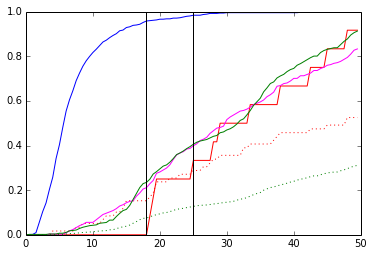

In [12]:
#sweet
#now I want to plot the distance to nearest WvW neighbor for these different pops
#will also want to separate spring sky LG gals
#want to do this as cumulative distribution function - is there an easy way to do this in matplotlib?
values_wvw, bins = np.histogram(wvw_dist['dist_wvw'], bins=100,range=(0,50))
n_wvw= float(len(wvw_dist['dist_wvw']))
cum_wvw = np.cumsum(values_wvw)

values_gals, bins = np.histogram(lg_wvw['WvW'], bins=100,range=(0,50))
cum_gals = np.cumsum(values_gals)/float(len(lg_wvw))

values_cands,bins = np.histogram(spring_cands_wvw['WvW'], bins=100,range=(0,50))
cum_cands = np.cumsum(values_cands)/float(len(spring_cands_wvw))

#get spring gals only:
values_spring_gals, bins = np.histogram(lg_spring_wvw['WvW'], bins=100,range=(0,50))
cum_spring_gals = np.cumsum(values_spring_gals)/float(len(lg_spring_wvw))
            
values_code9s,bins = np.histogram(code9s['WvW'], bins=100,range=(0,50))
cum_code9s = np.cumsum(values_code9s)/float(len(code9s))


values_spring_code9s,bins = np.histogram(spring_code9s['WvW'], bins=100,range=(0,50))
cum_spring_code9s = np.cumsum(values_spring_code9s)/float(len(spring_code9s))
    
# plot the cumulative function
plt.plot(bins[:-1], cum_wvw/n_wvw, c='blue')
plt.plot(bins[:-1],cum_gals,'r:')
plt.plot(bins[:-1],cum_spring_gals,'r')

plt.plot(bins[:-1],cum_cands,c='magenta')

plt.plot(bins[:-1],cum_code9s,'g:')
plt.plot(bins[:-1],cum_spring_code9s,'g')

plt.plot([25,25],[0,1],'k')
plt.plot([18,18],[0,1],'k')

In [ ]:
print 